# Download data from kaggle

In [1]:
!pip install -q kaggle
import json

data = {"username":"tunkedsaro","key":"ff3d00dc680ff94caf6f8d4d9bcd3168"}
json_data = json.dumps(data)

# Write the JSON string to a file
file_path = "/content/kaggle.json"
with open(file_path, 'w') as json_file:
    json_file.write(json_data)

!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c human-activity-recognition-har
!unzip /content/human-activity-recognition-har.zip

ref                                                    title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
adarshde/electric-vehicle-population-dataset           Electric Vehicle Population DataSet                   6MB  2024-07-17 17:17:38           1133         22  1.0              
rabieelkharoua/students-performance-dataset            📚 Students Performance Dataset 📚                     66KB  2024-06-12 23:09:20          17440        381  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024      Most Streamed Spotify Songs 2024                    496KB  2024-06-15 18:50:51          13113        276  1.0              
ihelon/coffee-sales                                    Coffee Sales                                      

In [2]:
import os
from glob import glob
from natsort import os_sorted
from tqdm import tqdm

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
input_dir = "/content/HAR"
train_dir = input_dir + "/train"
test_dir  = input_dir + "/test"
df_paths  = glob(os.path.join(train_dir,'*','*.csv'))

# Concat df

In [4]:
concatdf = []
for activity_dir in os.listdir(train_dir):
    if activity_dir[0] == '.':
        continue
    print(activity_dir)
    for csv_file in os.listdir(os.path.join(train_dir,activity_dir)):
        print(os.path.join(train_dir, activity_dir, csv_file))
        df = pd.read_csv(os.path.join(train_dir, activity_dir, csv_file))
        df['label'] = activity_dir
        print(csv_file,df.shape[0],"->",200*(df.shape[0]//200))
        concatdf.append(df[:200*(df.shape[0]//200)])
        # break
    # break
frame = pd.concat(concatdf)

Downstairs
/content/HAR/train/Downstairs/23.csv
23.csv 1939 -> 1800
/content/HAR/train/Downstairs/16.csv
16.csv 1575 -> 1400
/content/HAR/train/Downstairs/20.csv
20.csv 4673 -> 4600
/content/HAR/train/Downstairs/19.csv
19.csv 2614 -> 2600
/content/HAR/train/Downstairs/11.csv
11.csv 2674 -> 2600
/content/HAR/train/Downstairs/6.csv
6.csv 1433 -> 1400
/content/HAR/train/Downstairs/10.csv
10.csv 3795 -> 3600
/content/HAR/train/Downstairs/24.csv
24.csv 2929 -> 2800
/content/HAR/train/Downstairs/22.csv
22.csv 3627 -> 3600
/content/HAR/train/Downstairs/15.csv
15.csv 1762 -> 1600
/content/HAR/train/Downstairs/18.csv
18.csv 2415 -> 2400
/content/HAR/train/Downstairs/26.csv
26.csv 3837 -> 3800
/content/HAR/train/Downstairs/12.csv
12.csv 2870 -> 2800
/content/HAR/train/Downstairs/28.csv
28.csv 2997 -> 2800
/content/HAR/train/Downstairs/5.csv
5.csv 3281 -> 3200
/content/HAR/train/Downstairs/3.csv
3.csv 3326 -> 3200
/content/HAR/train/Downstairs/8.csv
8.csv 3346 -> 3200
/content/HAR/train/Downstair

In [5]:
frame

,x-axis,y-axis,z-axis,label
0,2.22,9.30,4.63,Downstairs
1,2.22,9.30,4.63,Downstairs
2,-1.61,17.92,-0.91,Downstairs
3,-1.61,17.92,-0.91,Downstairs
4,0.46,14.18,0.38,Downstairs
...,...,...,...,...
8995,-14.48,16.32,-9.85,Jogging
8996,-4.67,12.91,-3.57,Jogging
8997,-5.63,-1.31,-4.40,Jogging
8998,-1.14,-6.28,-5.24,Jogging


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
label_encoder = LabelEncoder()

In [8]:
frame['label'] = label_encoder.fit_transform(frame['label'])
frame

,x-axis,y-axis,z-axis,label
0,2.22,9.30,4.63,0
1,2.22,9.30,4.63,0
2,-1.61,17.92,-0.91,0
3,-1.61,17.92,-0.91,0
4,0.46,14.18,0.38,0
...,...,...,...,...
8995,-14.48,16.32,-9.85,1
8996,-4.67,12.91,-3.57,1
8997,-5.63,-1.31,-4.40,1
8998,-1.14,-6.28,-5.24,1


# Apply mean and STD

In [9]:
nr = 200
new = []
frame = frame
for i in tqdm(range(len(frame)//nr)):
    x = frame[i*nr:(i+1)*nr]
    a = x.groupby(['label'])[['x-axis','y-axis','z-axis']].mean()
    a = a.rename(columns={'x-axis':'x-axismean','y-axis':'y-axismean','z-axis':'z-axismean'})
    b = x.groupby(['label'])[['x-axis','y-axis','z-axis']].std()
    b = b.rename(columns={'x-axis':'x-axisstd','y-axis':'y-axisstd','z-axis':'z-axisstd'})
    ab = a.join(b)
    new.append(ab)
train_df = pd.concat(new)
train_df

100%|██████████| 4345/4345 [00:41<00:00, 103.85it/s]


,x-axismean,y-axismean,z-axismean,x-axisstd,y-axisstd,z-axisstd
label,,,,,,
0,0.50640,10.31460,0.55375,3.450030,3.951825,3.435138
0,1.31370,10.03130,0.51080,2.851219,4.226819,3.317766
0,2.29345,10.04790,-0.04785,2.844370,4.005444,3.375252
0,2.75700,9.88925,0.01855,2.910384,4.296941,3.380196
0,2.96670,9.93850,-0.61785,3.333987,3.962635,3.971838
...,...,...,...,...,...,...
1,-6.99210,6.96515,-0.65160,7.367288,7.923615,7.300940
1,-6.48110,7.33745,-0.44560,7.003076,8.224168,7.543601
1,-6.52510,6.86540,-0.47310,7.328829,7.666679,7.401170


In [10]:
# Create dummy axis
train_df['activity'] = train_df.index
# Remove axis
train_df.reset_index(drop=True, inplace=True)

In [11]:
df = train_df
df

,x-axismean,y-axismean,z-axismean,x-axisstd,y-axisstd,z-axisstd,activity
0,0.50640,10.31460,0.55375,3.450030,3.951825,3.435138,0
1,1.31370,10.03130,0.51080,2.851219,4.226819,3.317766,0
2,2.29345,10.04790,-0.04785,2.844370,4.005444,3.375252,0
3,2.75700,9.88925,0.01855,2.910384,4.296941,3.380196,0
4,2.96670,9.93850,-0.61785,3.333987,3.962635,3.971838,0
...,...,...,...,...,...,...,...
4340,-6.99210,6.96515,-0.65160,7.367288,7.923615,7.300940,1
4341,-6.48110,7.33745,-0.44560,7.003076,8.224168,7.543601,1
4342,-6.52510,6.86540,-0.47310,7.328829,7.666679,7.401170,1
4343,-6.64195,6.51110,-0.62820,6.985011,7.849459,7.473228,1


<hr>

# KAN

## Import library

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

In [13]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split

# Data loader for Pytoch

In [14]:
class MyDataset(Dataset):
    # def __init__(self, data, label, transform=None):
    #     self.data = data
    #     self.label = label
    #     self.transform = transform
    def __init__(self, data, label, transform=None):
        self.data = torch.tensor(data, dtype=torch.float32)
        self.label = torch.tensor(label, dtype=torch.long)
        self.transform = transform
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        image = self.data[idx]
        label = self.label[idx]
        return image, label

In [15]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
y

array([0, 0, 0, ..., 1, 1, 1])

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
trainset = MyDataset(X_train, y_train)
valset   = MyDataset(X_val, y_val)

In [18]:
valset[1]

(tensor([-1.0156,  9.7184, -0.3783,  3.1559,  4.8023,  4.1715]), tensor(5))

In [19]:
# Data loader
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
valloader   = DataLoader(valset, batch_size=64, shuffle=False)

<hr>

# KAN Model

In [20]:
import torch
import torch.nn.functional as F
import math


class KANLinear(torch.nn.Module):
    def __init__(
        self,
        in_features,
        out_features,
        grid_size=5,
        spline_order=3,
        scale_noise=0.1,
        scale_base=1.0,
        scale_spline=1.0,
        enable_standalone_scale_spline=True,
        base_activation=torch.nn.SiLU,
        grid_eps=0.02,
        grid_range=[-1, 1],
    ):
        super(KANLinear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.grid_size = grid_size
        self.spline_order = spline_order

        h = (grid_range[1] - grid_range[0]) / grid_size
        grid = (
            (
                torch.arange(-spline_order, grid_size + spline_order + 1) * h
                + grid_range[0]
            )
            .expand(in_features, -1)
            .contiguous()
        )
        self.register_buffer("grid", grid)

        self.base_weight = torch.nn.Parameter(torch.Tensor(out_features, in_features))
        self.spline_weight = torch.nn.Parameter(
            torch.Tensor(out_features, in_features, grid_size + spline_order)
        )
        if enable_standalone_scale_spline:
            self.spline_scaler = torch.nn.Parameter(
                torch.Tensor(out_features, in_features)
            )

        self.scale_noise = scale_noise
        self.scale_base = scale_base
        self.scale_spline = scale_spline
        self.enable_standalone_scale_spline = enable_standalone_scale_spline
        self.base_activation = base_activation()
        self.grid_eps = grid_eps

        self.reset_parameters()

    def reset_parameters(self):
        torch.nn.init.kaiming_uniform_(self.base_weight, a=math.sqrt(5) * self.scale_base)
        with torch.no_grad():
            noise = (
                (
                    torch.rand(self.grid_size + 1, self.in_features, self.out_features)
                    - 1 / 2
                )
                * self.scale_noise
                / self.grid_size
            )
            self.spline_weight.data.copy_(
                (self.scale_spline if not self.enable_standalone_scale_spline else 1.0)
                * self.curve2coeff(
                    self.grid.T[self.spline_order : -self.spline_order],
                    noise,
                )
            )
            if self.enable_standalone_scale_spline:
                # torch.nn.init.constant_(self.spline_scaler, self.scale_spline)
                torch.nn.init.kaiming_uniform_(self.spline_scaler, a=math.sqrt(5) * self.scale_spline)

    def b_splines(self, x: torch.Tensor):
        """
        Compute the B-spline bases for the given input tensor.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, in_features).

        Returns:
            torch.Tensor: B-spline bases tensor of shape (batch_size, in_features, grid_size + spline_order).
        """
        assert x.dim() == 2 and x.size(1) == self.in_features

        grid: torch.Tensor = (
            self.grid
        )  # (in_features, grid_size + 2 * spline_order + 1)
        x = x.unsqueeze(-1)
        bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)
        for k in range(1, self.spline_order + 1):
            bases = (
                (x - grid[:, : -(k + 1)])
                / (grid[:, k:-1] - grid[:, : -(k + 1)])
                * bases[:, :, :-1]
            ) + (
                (grid[:, k + 1 :] - x)
                / (grid[:, k + 1 :] - grid[:, 1:(-k)])
                * bases[:, :, 1:]
            )

        assert bases.size() == (
            x.size(0),
            self.in_features,
            self.grid_size + self.spline_order,
        )
        return bases.contiguous()

    def curve2coeff(self, x: torch.Tensor, y: torch.Tensor):
        """
        Compute the coefficients of the curve that interpolates the given points.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, in_features).
            y (torch.Tensor): Output tensor of shape (batch_size, in_features, out_features).

        Returns:
            torch.Tensor: Coefficients tensor of shape (out_features, in_features, grid_size + spline_order).
        """
        assert x.dim() == 2 and x.size(1) == self.in_features
        assert y.size() == (x.size(0), self.in_features, self.out_features)

        A = self.b_splines(x).transpose(
            0, 1
        )  # (in_features, batch_size, grid_size + spline_order)
        B = y.transpose(0, 1)  # (in_features, batch_size, out_features)
        solution = torch.linalg.lstsq(
            A, B
        ).solution  # (in_features, grid_size + spline_order, out_features)
        result = solution.permute(
            2, 0, 1
        )  # (out_features, in_features, grid_size + spline_order)

        assert result.size() == (
            self.out_features,
            self.in_features,
            self.grid_size + self.spline_order,
        )
        return result.contiguous()

    @property
    def scaled_spline_weight(self):
        return self.spline_weight * (
            self.spline_scaler.unsqueeze(-1)
            if self.enable_standalone_scale_spline
            else 1.0
        )

    def forward(self, x: torch.Tensor):
        assert x.size(-1) == self.in_features
        original_shape = x.shape
        x = x.view(-1, self.in_features)

        base_output = F.linear(self.base_activation(x), self.base_weight)
        spline_output = F.linear(
            self.b_splines(x).view(x.size(0), -1),
            self.scaled_spline_weight.view(self.out_features, -1),
        )
        output = base_output + spline_output

        output = output.view(*original_shape[:-1], self.out_features)
        return output

    @torch.no_grad()
    def update_grid(self, x: torch.Tensor, margin=0.01):
        assert x.dim() == 2 and x.size(1) == self.in_features
        batch = x.size(0)

        splines = self.b_splines(x)  # (batch, in, coeff)
        splines = splines.permute(1, 0, 2)  # (in, batch, coeff)
        orig_coeff = self.scaled_spline_weight  # (out, in, coeff)
        orig_coeff = orig_coeff.permute(1, 2, 0)  # (in, coeff, out)
        unreduced_spline_output = torch.bmm(splines, orig_coeff)  # (in, batch, out)
        unreduced_spline_output = unreduced_spline_output.permute(
            1, 0, 2
        )  # (batch, in, out)

        # sort each channel individually to collect data distribution
        x_sorted = torch.sort(x, dim=0)[0]
        grid_adaptive = x_sorted[
            torch.linspace(
                0, batch - 1, self.grid_size + 1, dtype=torch.int64, device=x.device
            )
        ]

        uniform_step = (x_sorted[-1] - x_sorted[0] + 2 * margin) / self.grid_size
        grid_uniform = (
            torch.arange(
                self.grid_size + 1, dtype=torch.float32, device=x.device
            ).unsqueeze(1)
            * uniform_step
            + x_sorted[0]
            - margin
        )

        grid = self.grid_eps * grid_uniform + (1 - self.grid_eps) * grid_adaptive
        grid = torch.concatenate(
            [
                grid[:1]
                - uniform_step
                * torch.arange(self.spline_order, 0, -1, device=x.device).unsqueeze(1),
                grid,
                grid[-1:]
                + uniform_step
                * torch.arange(1, self.spline_order + 1, device=x.device).unsqueeze(1),
            ],
            dim=0,
        )

        self.grid.copy_(grid.T)
        self.spline_weight.data.copy_(self.curve2coeff(x, unreduced_spline_output))

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        """
        Compute the regularization loss.

        This is a dumb simulation of the original L1 regularization as stated in the
        paper, since the original one requires computing absolutes and entropy from the
        expanded (batch, in_features, out_features) intermediate tensor, which is hidden
        behind the F.linear function if we want an memory efficient implementation.

        The L1 regularization is now computed as mean absolute value of the spline
        weights. The authors implementation also includes this term in addition to the
        sample-based regularization.
        """
        l1_fake = self.spline_weight.abs().mean(-1)
        regularization_loss_activation = l1_fake.sum()
        p = l1_fake / regularization_loss_activation
        regularization_loss_entropy = -torch.sum(p * p.log())
        return (
            regularize_activation * regularization_loss_activation
            + regularize_entropy * regularization_loss_entropy
        )

In [21]:
class KAN(torch.nn.Module):
    def __init__(
        self,
        layers_hidden,
        grid_size=5,
        spline_order=3,
        scale_noise=0.1,
        scale_base=1.0,
        scale_spline=1.0,
        base_activation=torch.nn.SiLU,
        grid_eps=0.02,
        grid_range=[-1, 1],
    ):
        super(KAN, self).__init__()
        self.grid_size = grid_size
        self.spline_order = spline_order

        self.layers = torch.nn.ModuleList()
        for in_features, out_features in zip(layers_hidden, layers_hidden[1:]):
            self.layers.append(
                KANLinear(
                    in_features,
                    out_features,
                    grid_size=grid_size,
                    spline_order=spline_order,
                    scale_noise=scale_noise,
                    scale_base=scale_base,
                    scale_spline=scale_spline,
                    base_activation=base_activation,
                    grid_eps=grid_eps,
                    grid_range=grid_range,
                )
            )

    def forward(self, x: torch.Tensor, update_grid=False):
        for layer in self.layers:
            if update_grid:
                layer.update_grid(x)
            x = layer(x)
        return x

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        return sum(
            layer.regularization_loss(regularize_activation, regularize_entropy)
            for layer in self.layers
        )

In [22]:
input_size = X_train.shape[1]
num_classes = 6

In [23]:
X_train.shape

(3476, 6)

In [24]:
model = KAN([input_size,128,64,num_classes])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

KAN(
  (layers): ModuleList(
    (0-2): 3 x KANLinear(
      (base_activation): SiLU()
    )
  )
)

In [25]:
# Define optimizer
optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)
# Define learning rate scheduler
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.8)

In [26]:
# Define loss
criterion = nn.CrossEntropyLoss()

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

## Train KAN model

In [27]:
for epoch in range(20):
    # Train
    model.train()
    epoch_train_loss = 0
    epoch_train_accuracy = 0
    with tqdm(trainloader) as pbar:
        for i, (images, labels) in enumerate(pbar):
            images = images.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            accuracy = (output.argmax(dim=1) == labels).float().mean()
            epoch_train_loss += loss.item()
            epoch_train_accuracy += accuracy.item()
            pbar.set_postfix(loss=loss.item(), accuracy=accuracy.item(), lr=optimizer.param_groups[0]['lr'])

    epoch_train_loss /= len(trainloader)
    epoch_train_accuracy /= len(trainloader)
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_accuracy)

    # Validation
    model.eval()
    val_loss = 0
    val_accuracy = 0
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for images, labels in valloader:
            images = images.to(device)
            labels = labels.to(device)
            output = model(images)
            val_loss += criterion(output, labels).item()
            val_accuracy += (output.argmax(dim=1) == labels).float().mean().item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(output.argmax(dim=1).cpu().numpy())

    val_loss /= len(valloader)
    val_accuracy /= len(valloader)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Update learning rate
    scheduler.step()

    print(f"Epoch {epoch + 1}, Train Loss: {epoch_train_loss}, Train Accuracy: {epoch_train_accuracy}, Val Loss: {val_loss}, Val Accuracy: {val_accuracy}")

100%|██████████| 55/55 [00:01<00:00, 34.22it/s, accuracy=0.7, loss=0.908, lr=0.001]


Epoch 1, Train Loss: 0.9085198337381536, Train Accuracy: 0.6996590906923468, Val Loss: 0.6704354201044355, Val Accuracy: 0.7579934852463859


100%|██████████| 55/55 [00:01<00:00, 41.51it/s, accuracy=0.9, loss=0.398, lr=0.0008]


Epoch 2, Train Loss: 0.57012540102005, Train Accuracy: 0.797613635930148, Val Loss: 0.5875765042645591, Val Accuracy: 0.8023347003119332


100%|██████████| 55/55 [00:01<00:00, 50.34it/s, accuracy=0.85, loss=0.419, lr=0.00064]


Epoch 3, Train Loss: 0.49648689194159074, Train Accuracy: 0.8202840913425792, Val Loss: 0.5355067061526435, Val Accuracy: 0.8195885632719312


100%|██████████| 55/55 [00:01<00:00, 47.93it/s, accuracy=0.9, loss=0.306, lr=0.000512]


Epoch 4, Train Loss: 0.4561666353182359, Train Accuracy: 0.8442045450210571, Val Loss: 0.5015554555824825, Val Accuracy: 0.8232384153774807


100%|██████████| 55/55 [00:01<00:00, 49.50it/s, accuracy=0.95, loss=0.25, lr=0.00041]


Epoch 5, Train Loss: 0.4244993361559781, Train Accuracy: 0.8522159088741649, Val Loss: 0.47689099822725567, Val Accuracy: 0.834399129663195


100%|██████████| 55/55 [00:01<00:00, 49.26it/s, accuracy=0.9, loss=0.445, lr=0.000328]


Epoch 6, Train Loss: 0.4073785375465046, Train Accuracy: 0.8586931813846935, Val Loss: 0.4609798320702144, Val Accuracy: 0.847490348986217


100%|██████████| 55/55 [00:01<00:00, 49.42it/s, accuracy=0.65, loss=0.691, lr=0.000262]


Epoch 7, Train Loss: 0.39206634651530875, Train Accuracy: 0.8618181813846935, Val Loss: 0.45573011679308756, Val Accuracy: 0.8463742775576455


100%|██████████| 55/55 [00:01<00:00, 47.44it/s, accuracy=1, loss=0.178, lr=0.00021]


Epoch 8, Train Loss: 0.37379603846506637, Train Accuracy: 0.8690340909090909, Val Loss: 0.43576024898460936, Val Accuracy: 0.8452582061290741


100%|██████████| 55/55 [00:01<00:00, 49.20it/s, accuracy=0.85, loss=0.385, lr=0.000168]


Epoch 9, Train Loss: 0.3668430518020283, Train Accuracy: 0.8671590913425792, Val Loss: 0.42653654728616985, Val Accuracy: 0.8508385632719312


100%|██████████| 55/55 [00:01<00:00, 43.37it/s, accuracy=0.8, loss=0.433, lr=0.000134]


Epoch 10, Train Loss: 0.35916924612088635, Train Accuracy: 0.8705113638531078, Val Loss: 0.42207670850413187, Val Accuracy: 0.8541867775576455


100%|██████████| 55/55 [00:01<00:00, 35.57it/s, accuracy=0.9, loss=0.22, lr=0.000107]


Epoch 11, Train Loss: 0.3511005640029907, Train Accuracy: 0.876022726839239, Val Loss: 0.4160764387675694, Val Accuracy: 0.8564189204147884


100%|██████████| 55/55 [00:01<00:00, 37.73it/s, accuracy=1, loss=0.172, lr=8.59e-5]


Epoch 12, Train Loss: 0.345488934896209, Train Accuracy: 0.8755681818181819, Val Loss: 0.41193993602480206, Val Accuracy: 0.8575349918433598


100%|██████████| 55/55 [00:01<00:00, 48.56it/s, accuracy=0.9, loss=0.271, lr=6.87e-5]


Epoch 13, Train Loss: 0.3424454683607275, Train Accuracy: 0.8737499995665117, Val Loss: 0.4097036761896951, Val Accuracy: 0.8541867775576455


100%|██████████| 55/55 [00:01<00:00, 50.45it/s, accuracy=0.85, loss=0.292, lr=5.5e-5]


Epoch 14, Train Loss: 0.3396483705802397, Train Accuracy: 0.8756818186153065, Val Loss: 0.40684001786368235, Val Accuracy: 0.8564189204147884


100%|██████████| 55/55 [00:01<00:00, 50.77it/s, accuracy=0.9, loss=0.214, lr=4.4e-5]


Epoch 15, Train Loss: 0.3365116989070719, Train Accuracy: 0.8754545450210571, Val Loss: 0.4058585890701839, Val Accuracy: 0.8575349918433598


100%|██████████| 55/55 [00:01<00:00, 48.41it/s, accuracy=0.9, loss=0.416, lr=3.52e-5]


Epoch 16, Train Loss: 0.3375509497794238, Train Accuracy: 0.8765909086574207, Val Loss: 0.4044151710612433, Val Accuracy: 0.8575349918433598


100%|██████████| 55/55 [00:01<00:00, 39.80it/s, accuracy=0.8, loss=0.41, lr=2.81e-5]


Epoch 17, Train Loss: 0.33578480807217687, Train Accuracy: 0.8756250002167442, Val Loss: 0.4035865728344236, Val Accuracy: 0.8575349918433598


100%|██████████| 55/55 [00:01<00:00, 45.85it/s, accuracy=0.7, loss=0.737, lr=2.25e-5]


Epoch 18, Train Loss: 0.33851668347011915, Train Accuracy: 0.8783522725105286, Val Loss: 0.4018089771270752, Val Accuracy: 0.8575349918433598


100%|██████████| 55/55 [00:01<00:00, 46.90it/s, accuracy=0.8, loss=0.507, lr=1.8e-5]


Epoch 19, Train Loss: 0.3346239211884412, Train Accuracy: 0.876193182034926, Val Loss: 0.4014676937035152, Val Accuracy: 0.8575349918433598


100%|██████████| 55/55 [00:01<00:00, 41.74it/s, accuracy=0.9, loss=0.324, lr=1.44e-5]


Epoch 20, Train Loss: 0.33173539313403044, Train Accuracy: 0.8782954541119662, Val Loss: 0.40052243215697153, Val Accuracy: 0.8575349918433598


# Training Plot of Network

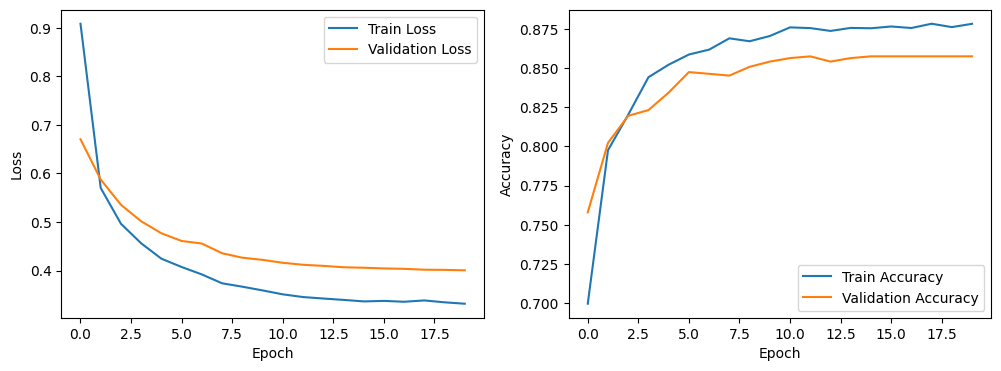

In [28]:
# Plot training and validation loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

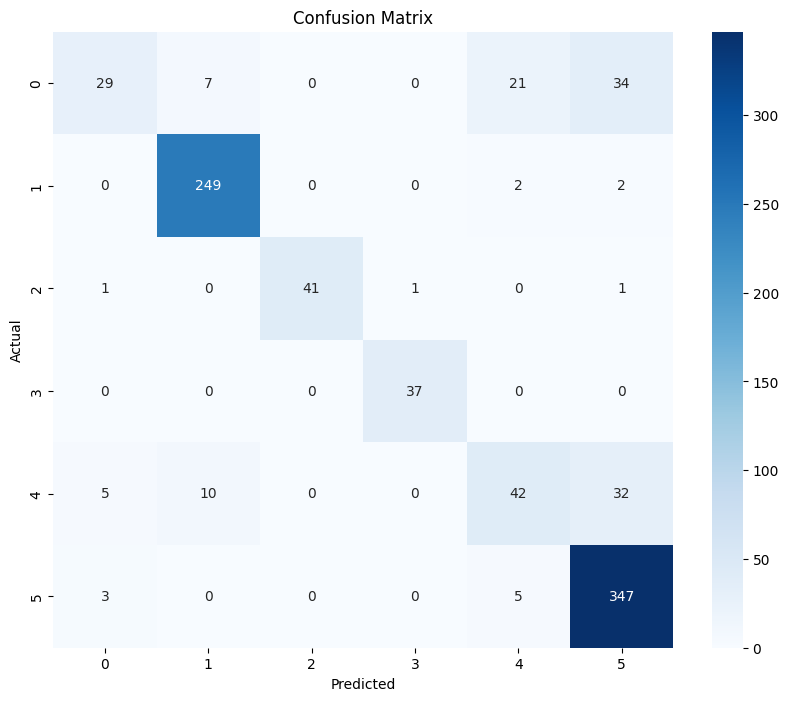

In [29]:
import numpy as np

# Define class labels
class_labels = np.arange(6)

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
test = pd.read_csv("/content/HAR/test/003d40b5-56ed-43cc-a4cc-5c901d542afc.csv")
test

,x-axis,y-axis,z-axis
0,6.442424,18.918663,0.422231
1,-5.856750,9.043911,4.208687
2,-4.753501,19.572440,-3.105439
3,6.469665,18.727978,2.029432
4,-8.308413,11.182305,-8.689782
...,...,...,...
195,0.844462,0.694638,-5.407278
196,6.932757,12.789507,6.442424
197,7.545672,2.070293,1.416516
198,3.759216,4.099725,1.947710


In [31]:
x = test
x['label'] = 'xxx'
a = x.groupby(['label'])[['x-axis','y-axis','z-axis']].mean()
a = a.rename(columns={'x-axis':'x-axismean','y-axis':'y-axismean','z-axis':'z-axismean'})
b = x.groupby(['label'])[['x-axis','y-axis','z-axis']].std()
b = b.rename(columns={'x-axis':'x-axisstd','y-axis':'y-axisstd','z-axis':'z-axisstd'})
ab = a.join(b)
ab.reset_index(drop=True, inplace=True)
ab

,x-axismean,y-axismean,z-axismean,x-axisstd,y-axisstd,z-axisstd
0,2.39936,10.388035,0.818855,6.593611,7.650325,4.349956


In [32]:
X_test = (ab-0.5)/0.5
X_test

,x-axismean,y-axismean,z-axismean,x-axisstd,y-axisstd,z-axisstd
0,3.798721,19.77607,0.637711,12.187223,14.300649,7.699911


In [33]:
# Convert test data to PyTorch tensor
test_data = torch.tensor(X_test.values, dtype=torch.float32)

In [34]:
# Load the trained model
input_size = X_train.shape[1]
num_classes = len(label_encoder.classes_)
model = KAN([input_size, 128, 64, num_classes])
# model.load_state_dict(torch.load('path_to_your_saved_model.pth'))
model.to(device)
model.eval()

# Make predictions
with torch.no_grad():
    output = model(test_data)
    predicted_label_idx = output.argmax(dim=1).cpu().numpy()

# Convert the predicted label index back to the original label
predicted_label = label_encoder.inverse_transform(predicted_label_idx)

predicted_label

array(['Walking'], dtype=object)

In [35]:
submit_df = pd.read_csv("/content/sample_submission.csv")
folder_path = "/content/HAR/test"

In [36]:
input_size = 6
num_classes = 6
model = KAN([input_size,128,64,num_classes])
# model.load_state_dict(torch.load("model"))
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
model.to(device)
model.eval()

KAN(
  (layers): ModuleList(
    (0-2): 3 x KANLinear(
      (base_activation): SiLU()
    )
  )
)

In [37]:
for idx, row in submit_df[:].iterrows():
    csvfile = os.path.join(folder_path,row['id'])
    x = pd.read_csv(csvfile)
    x['label'] = 'xxx'
    a = x.groupby(['label'])[['x-axis','y-axis','z-axis']].mean()
    a = a.rename(columns={'x-axis':'x-axismean','y-axis':'y-axismean','z-axis':'z-axismean'})
    b = x.groupby(['label'])[['x-axis','y-axis','z-axis']].std()
    b = b.rename(columns={'x-axis':'x-axisstd','y-axis':'y-axisstd','z-axis':'z-axisstd'})
    ab = a.join(b)
    ab.reset_index(drop=True, inplace=True)

    X_test = (ab-0.5)/0.5
    test_data = torch.tensor(X_test.values, dtype=torch.float32).to(device)
    with torch.no_grad():
        output = model(test_data)
        predicted_label_idx = output.argmax(dim=1).cpu().numpy()
    # Convert the predicted label index back to the original label
    predicted_label = label_encoder.inverse_transform(predicted_label_idx)
    submit_df.at[idx, 'class'] = predicted_label[0]

In [38]:
submit_df

,id,class
0,003d40b5-56ed-43cc-a4cc-5c901d542afc.csv,Sitting
1,004c721f-2a5c-45ca-9faa-54b0c5e2188b.csv,Sitting
2,005af30b-08f6-4695-9509-41a9f2722c2e.csv,Downstairs
3,00975e94-b081-4c14-962f-026acc55d9f3.csv,Sitting
4,00dccf4d-375c-4d95-9441-7ff0d3687314.csv,Sitting
...,...,...
688,fe7c2cc3-606f-461d-8667-fbb5ceb1ecfb.csv,Sitting
689,fe96f6d3-4c66-414e-bdce-71cb988c83de.csv,Downstairs
690,fed2f223-196d-4b5d-b5ae-55e537611b41.csv,Jogging
691,ffa15772-28a4-4fe2-bd53-d23904d92e58.csv,Downstairs


In [39]:
import time
version = 'KAN'
formatted_time = time.strftime("%H.%M", time.localtime())
formatted_time = str(int(formatted_time.split(".")[0])+7)+formatted_time.split(".")[1]
formatted_time
csv_name = f'v.{version}.{formatted_time}.csv'
print(csv_name)
submit_df.to_csv(csv_name,index=False)

v.KAN.1750.csv
